# Cálculo de $\beta (s)$

[[0.00000000e+00 6.24963053e+01]
 [1.56874303e-04 6.36164579e+01]
 [6.05142617e-04 6.36164579e+01]
 [1.22608733e-03 6.42880163e+01]
 [2.00003386e-03 6.78799400e+01]
 [2.86485581e-03 6.78799400e+01]
 [3.78138106e-03 7.01627418e+01]
 [5.72490692e-03 7.01627418e+01]
 [7.76210614e-03 7.34711015e+01]
 [9.85062029e-03 7.34711015e+01]
 [1.19751990e-02 7.69880842e+01]
 [1.41247930e-02 7.69880842e+01]
 [1.62925944e-02 7.99279134e+01]
 [1.84737742e-02 8.01738085e+01]
 [2.06656810e-02 8.21847706e+01]
 [2.28666086e-02 8.19264505e+01]
 [2.50745583e-02 8.19264505e+01]
 [2.72881240e-02 8.42210066e+01]
 [2.95060501e-02 8.42210066e+01]
 [3.17280591e-02 8.42210066e+01]
 [3.39534096e-02 8.65976372e+01]
 [3.61816250e-02 8.65976372e+01]
 [3.84121723e-02 8.65976372e+01]
 [4.06448208e-02 8.76284322e+01]
 [4.28792872e-02 8.76284322e+01]
 [4.51152511e-02 8.76284322e+01]
 [4.73524593e-02 8.69919568e+01]
 [4.95906956e-02 8.86017204e+01]
 [5.18299080e-02 8.81422697e+01]
 [5.40699139e-02 8.81422697e+01]
 [5.631060

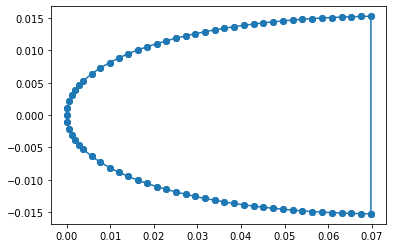

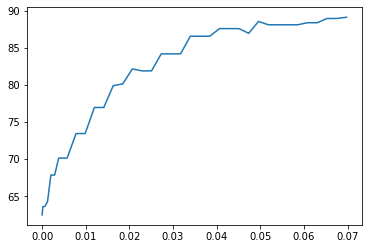

In [1]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
Elementos = pd.read_csv('elementos.txt')
Velocidades = pd.read_csv('flujo_velocidades.axdt')
Superficie = pd.read_csv('perfil.csv')
Superficie = Superficie[Superficie['X[m]']<0.07]
Superficie = Superficie.sort_values(by=['Y[m]'])


Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie)
Modelo.set_T_remanso(273.15-5)
Modelo.set_presion_remanso(1e5)
Modelo.V_infinito=Modelo.V_infinito[5:] 
x,y=Modelo.exterior.xy
plt.plot(x,y,'o-')
plt.figure()
plt.plot(Modelo.V_infinito[:,0],Modelo.V_infinito[:,1])
print(Modelo.V_infinito)

Genero una población de gotas

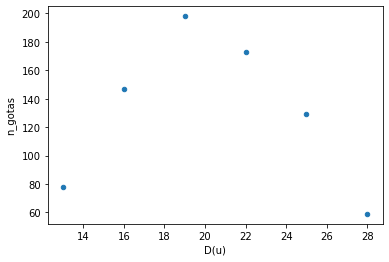

In [21]:
N_gotas =500
mu_D = 20
sd_D = 5
diametros_estudiados =[i for i in range(13,30,3)]
#diametros_estudiados=[20]
Diameters = pd.DataFrame(data=np.abs(np.random.normal(mu_D, sd_D, N_gotas)),columns=['Diametros'])
D_gotas =[]
for diametro in diametros_estudiados:    
    numero_gotas = Diameters[np.abs(Diameters['Diametros']-diametro)<2.5]['Diametros']
    D_gotas.append([diametro,len(numero_gotas)])
D_gotas = pd.DataFrame(data=D_gotas,columns=['D(u)','n_gotas'])
D_gotas.plot.scatter(x='D(u)',y='n_gotas')

calculando tiempo...
13.96100817124049 min
11.074549913406372 min
8.19255355199178 min
5.362437152862547 min
2.774810386498771 min
0.0 min


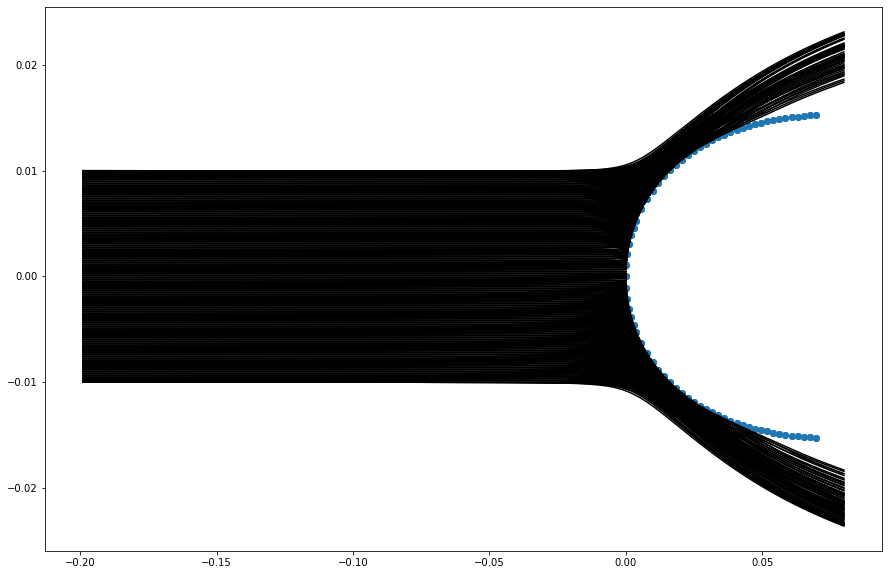

In [22]:
x_0 = min(Modelo.x_nodo) + 1e-3
x_f = 0.08
plt.figure(figsize =(15,10))
plt.plot(Modelo.x_superficie,Modelo.y_superficie,'o')
beta_x = []
U_d0 = 70
V_d0 = 0
#D =20e-6
N=1
print('calculando tiempo...')
tiempo_inicial=time.time()
D_gotas.index = D_gotas['D(u)']
for D in list(D_gotas['D(u)']):
    numero_gotas=D_gotas.loc[D]['n_gotas']
    D=D*10**-6    
    #if (N*100//N_gotas)==(N*100/N_gotas):print(N*100/N_gotas)
    #print(N*100/N_gotas)
    n_nodos = 500
    for y_0 in np.linspace(-0.01,0.01,100):
        (x,y,U_d,V_d,t) = Modelo.trayectoria_gota(x_0,x_f,y_0,U_d0,V_d0,D,n_nodos)
        #trayectoria_gota(self,x_0,x_f,y_0,U_d0,V_d0,D,n_nodos)
        x_proyecccion =Modelo.proyeccion_gota(x_0,y_0,x_f,n_nodos)
        ds = np.sqrt((y[-1]-y[0])**2+(x[-1]-x_proyecccion)**2)
        dy = np.abs(y[-1]-y[0])
        betha = dy/ds
        if y[-1] >=0:beta_x.append([D,x[-1],betha,'extrados',numero_gotas])
        else:beta_x.append([D,x[-1],betha,'intrados',numero_gotas])
        plt.plot(x,y,'k')
    print(str((time.time()-tiempo_inicial)/N*len(diametros_estudiados)/60-(time.time()-tiempo_inicial)/60)+' min')
    N=N+1


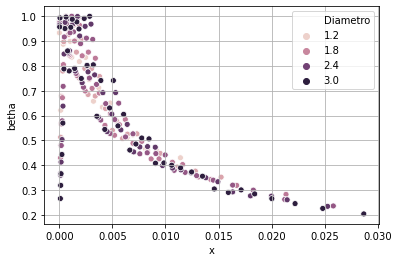

In [25]:
bethas = pd.DataFrame(data=beta_x,columns=['Diametro','x','betha','zona','n_gotas'])
bethas=bethas.dropna()
bethas = bethas[bethas['zona']=='intrados']
bethas['Volumen']=bethas['Diametro']**3*bethas['n_gotas']
bethas['Volumen']=bethas['Diametro']**3*bethas['n_gotas']
V_total = sum(bethas['Volumen'])
bethas
#bethas[bethas.x<0.1].plot.scatter(x='x',y='betha',c='zona',colormap='viridis')
g =sns.scatterplot(x="x", y="betha",
              hue="Diametro",
              data=bethas[bethas.x<0.07])  
plt.grid()

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035]


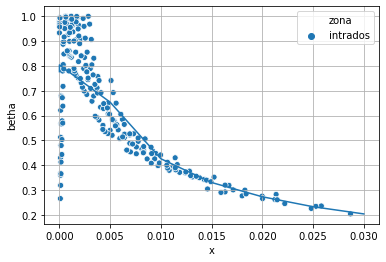

In [26]:

X = np.arange(0.00,0.04,0.005)
print(X)
betha_x =[]
df=bethas[np.abs(bethas['x']-0)<0.00125]
betha_array = np.array(df.betha)
Volumen_array = np.array(df.Volumen)
if sum(Volumen_array)!=0:
    betha_x.append([0,sum(betha_array[:]*Volumen_array)/sum(Volumen_array)])
for x in X:
    df=bethas[np.abs(bethas['x']-x)<0.0025]
    betha_array = np.array(df.betha)
    Volumen_array = np.array(df.Volumen)
    if sum(Volumen_array)!=0:
        betha_x.append([x,sum(betha_array[:]*Volumen_array)/sum(Volumen_array)])

betha_x = np.array(betha_x) 
g =sns.scatterplot(x="x", y="betha",
              hue="zona",
              data=bethas[bethas.x<0.07])  
plt.grid()
plt.plot(betha_x[:,0],betha_x[:,1])
print()

In [20]:
def normal_distribution(x,sd):
    return 1/(sd*np.sqrt(2*3.141592))*np.exp(-0.5*((x-0)/sd)**2)

In [13]:
from scipy.optimize import curve_fit

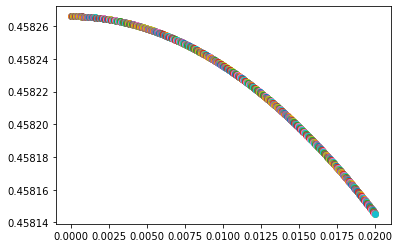

In [27]:
import pickle

In [28]:
pickle.dump( betha_x, open( "betha.p", "wb" ) )

# Calculo  de los calores

In [4]:
import pandas as pd
import numpy as np
import fem_velocidades  
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import seaborn as sns
import pickle


In [5]:
betha = pickle.load( open( "betha.p", "rb" ) )
betha = np.delete(betha, 0, 0)

print(betha)
def coll_efficiency(x,betha):
    x_nodos = betha[:,0]
    bethas = betha[:,1]
    for i in range(1,len(x_nodos)):
        if (x<=x_nodos[i]) and (x>=x_nodos[i-1]):
            return (x-x_nodos[i-1])/(x_nodos[i]-x_nodos[i-1])*(bethas[i]-bethas[i-1])+bethas[i-1]
            break

[[0.         0.80373673]
 [0.005      0.65359824]
 [0.01       0.42573693]
 [0.015      0.33000023]
 [0.02       0.27260002]
 [0.025      0.23250025]
 [0.03       0.20351352]]


In [5]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-15+273.15)
Modelo_termico.set_recovery_factor(.83)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.1)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.calculo_todos_calores()

x =np.linspace(0,0.02,100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for nodo in range(len(x)):
    for i in range(1,len(Modelo.V_infinito[:,0])):
        if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
            Ve=Modelo.V_infinito[i,1]
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
    Modelo_termico.V_e = Ve

    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
    if nodo !=0: Modelo_termico.set_recovery_factor(.83)
    n_0 =0.1
    n_1 = 0.2
    for i in range(iter_max):
        Modelo_termico.set_freezing_fraction(n_0)
        f_0 =Modelo_termico.calculo_todos_calores()
        Modelo_termico.set_freezing_fraction(n_1)
        f_1 =Modelo_termico.calculo_todos_calores()
        df = (f_1-f_0)/(n_1-n_0)
        n_2 = n_1 -f_1/df
        if abs(f_1)<0.1:
            break
        n_0 = n_1
        n_1 =n_2
    if i ==iter_max-1:
        print(i)
        n_1 =1
        break
    if n_1 >1:
        Modelo_termico.n_0=1
        T_0 =273.15
        T_1 =260
        for i in range(iter_max): 
            Modelo_termico.set_T_superficie(T_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_T_superficie(T_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(T_1-T_0)
            T_2 = T_1 -f_1/df
            if abs(f_1)<0.1:
                break
            T_0 = T_1
            T_1 =T_2
    
    Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
    if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
    Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
    Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
    T_sur[nodo] = Modelo_termico.T_superficie
    n[nodo] = Modelo_termico.n_0
    #print(Modelo_termico.n_0,Modelo_termico.m_out,x[nodo])
    #print(Modelo_termico.m_out,Modelo_termico.m_c,Modelo_termico.m_e)
    #print(Modelo_termico.T_superficie,Modelo_termico.n_0,Modelo_termico.m_in)




NameError: name 'h_c' is not defined

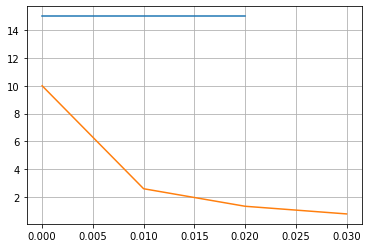

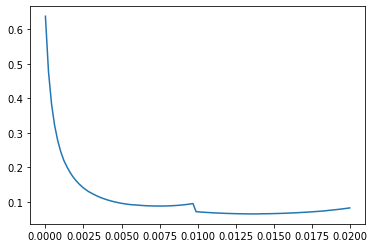

In [19]:
plt.figure()
plt.plot(x,T_sur-Modelo_termico.T_remanso)
x_sensor=np.array([0,0.01,0.02,0.03])
plt.plot(x_sensor,[10,2.6,1.34,0.79])
plt.grid()
plt.figure()
plt.plot(x,n)


In [ ]:
plt.plot(x,T_sur,'o')
plt.plot([0,0.01,0.02,0.03],[10,2.6,1.34,0.79])
plt.grid()

In [5]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([10.29,2.6,.6])

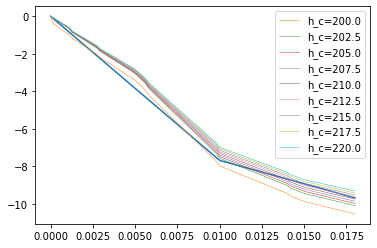

In [7]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-16.44+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental-T_experimental[0])
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in np.linspace(200,220,9):
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-T_sur[0],label='h_c='+str(h_c),linewidth=0.5)
plt.legend()
#lt.axis([0,0.02,0,20])

In [8]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([0,-2.85,-3.9])

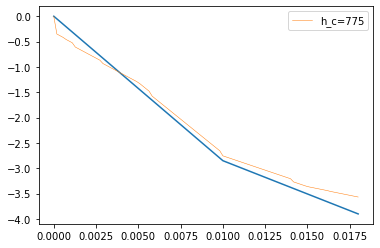

In [22]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-4.8+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.9)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental-T_experimental[0])
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [775]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

In [53]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-1.54,-4.29,-4.76])

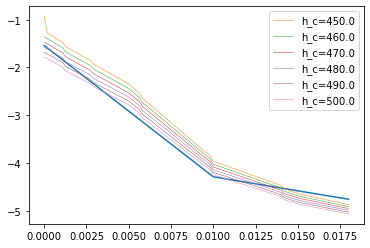

In [54]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-6.32+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.6)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in np.linspace(450,500,6):
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

In [63]:
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-4.05,-5.47,-5.73])

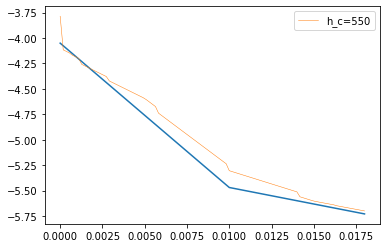

In [77]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(-6+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(0.3)
Modelo_termico.set_cuerda(11.01)
Modelo_termico.set_diametro_caracteristico(2.1)
Modelo_termico.set_velocidad_flujo(70)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores()
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
   
plt.legend()

## Cálculo de diámetro característico


In [4]:
def minimizacion_error(d,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(97)
    Modelo_termico.calculo_todos_calores_d(d)
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    for h_c in [550]:
        Modelo_termico.set_coeficiente_convectivo(h_c)
        for nodo in range(len(x)):
            for i in range(1,len(Modelo.V_infinito[:,0])):
                if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                    Ve=Modelo.V_infinito[i,1]
            Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
            Modelo_termico.V_e = Ve
            Modelo_termico.set_T_superficie(273.15)
            Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
            if nodo !=0:
                #print((Modelo_termico.Prandtl)**0.5)
                Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
            n_0 =0.1
            n_1 = 0.2
            for i in range(iter_max):
                Modelo_termico.set_freezing_fraction(n_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_freezing_fraction(n_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(n_1-n_0)
                n_2 = n_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                n_0 = n_1
                n_1 =n_2
            if i ==iter_max-1:
                print(i)
                n_1 =1
                break
            if n_1 >1:
                Modelo_termico.set_freezing_fraction(1)
                #print(Modelo_termico.n_0)
                T_0 =273.15
                T_1 =260
                for i in range(iter_max): 
                    Modelo_termico.set_T_superficie(T_0)
                    f_0 =Modelo_termico.calculo_todos_calores_d(d)
                    Modelo_termico.set_T_superficie(T_1)
                    f_1 =Modelo_termico.calculo_todos_calores_d(d)
                    df = (f_1-f_0)/(T_1-T_0)
                    T_2 = T_1 -f_1/df
                    if abs(f_1)<0.1:
                        break
                    T_0 = T_1
                    T_1 =T_2

            Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
            #print(Modelo_termico.m_e )
            #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
            #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
            if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
            Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
            Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
            T_sur[nodo] = Modelo_termico.T_superficie
            n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= T_sur[j]
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)
            
    #plt.legend()

In [33]:
from scipy.optimize import minimize
from scipy.optimize import Bounds


Help on class Bounds in module scipy.optimize._constraints:

class Bounds(builtins.object)
 |  Bounds(lb, ub, keep_feasible=False)
 |  
 |  Bounds constraint on the variables.
 |  
 |  The constraint has the general inequality form::
 |  
 |      lb <= x <= ub
 |  
 |  It is possible to use equal bounds to represent an equality constraint or
 |  infinite bounds to represent a one-sided constraint.
 |  
 |  Parameters
 |  ----------
 |  lb, ub : array_like, optional
 |      Lower and upper bounds on independent variables. Each array must
 |      have the same size as x or be a scalar, in which case a bound will be
 |      the same for all the variables. Set components of `lb` and `ub` equal
 |      to fix a variable. Use ``np.inf`` with an appropriate sign to disable
 |      bounds on all or some variables. Note that you can mix constraints of
 |      different types: interval, one-sided or equality, by setting different
 |      components of `lb` and `ub` as necessary.
 |  keep_feasibl

In [47]:

T_remanso=-4.8
LWC=0.9
V=70
#bounds = Bounds(0, 1)
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([0,-2.85,-3.9])

In [48]:
result = minimize(minimizacion_error,1e-2, args=(T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15), method='trust-constr')
d= float(result.x)

99
99
99
99
99
99


In [49]:
print(result.success)
print(d)
print(result.fun)

True
352687.9329236936
0.31917567327720964


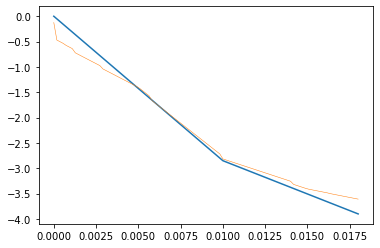

In [50]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(T_remanso+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(LWC)
Modelo_termico.set_cuerda(11.01)

Modelo_termico.set_velocidad_flujo(V)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores_d(d)
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores_d(d)
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores_d(d)
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5) 

In [59]:
T_remanso=-6.15
LWC=0.6
V=70
#bounds = Bounds(0, 1)
x_experimental = np.array([0,0.01,0.018])
T_experimental = np.array([-1.54,-4.29,-4.76])

In [60]:
result = minimize(minimizacion_error,1e-2, args=(T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15), method='trust-constr')
d= float(result.x)

In [61]:
print(result.success)
print(d)
print(result.fun)

True
810172.0103512496
0.2385044309407417


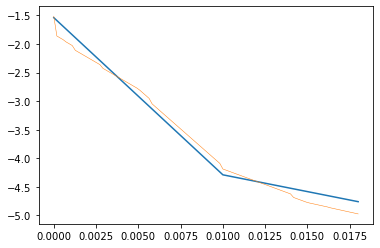

In [63]:
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.set_T_remanso(T_remanso+273.15)
Modelo_termico.set_recovery_factor(1)
Modelo_termico.set_presion_remanso(101325)
Modelo_termico.set_LWC(LWC)
Modelo_termico.set_cuerda(11.01)

Modelo_termico.set_velocidad_flujo(V)
Modelo_termico.set_freezing_fraction(0.8)
Modelo_termico.set_flujo_masico_entrada(0)
Modelo_termico.set_T_superficie_anterior(273.15)
Modelo_termico.set_cp_ws_anterior(1.004)
Modelo_termico.set_T_superficie(273.15)
Modelo_termico.set_local_collection_efficiency(0.5)
Modelo_termico.set_freezing_fraction(1)
Modelo_termico.set_tamano_gota(20e-6)
Modelo_termico.V_e = Modelo_termico.V
Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
Modelo_termico.set_coeficiente_convectivo(97)
Modelo_termico.calculo_todos_calores_d(d)
plt.plot(x_experimental,T_experimental)
x =np.linspace(0,x_experimental[-1],100)
col_eff = betha[:,1]
# print(x,col_eff)
# print(Modelo_termico.betha_stagnation,col_eff[0])
n = np.zeros(len(x))
iter_max =100
T_sur  = np.zeros(len(x))
for h_c in [550]:
    Modelo_termico.set_coeficiente_convectivo(h_c)
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores_d(d)
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores_d(d)
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            print(i)
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores_d(d)
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores_d(d)
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5) 

Ha fracasado el cálculo del diámetro característico

## Cálculo de $h_{c}$ 


Se crea una base de datos con todos los ensayos:


In [6]:
ensayo ={}


In [7]:
nombre_ensayo ='glaze_4B'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-6.15})
ensayo[nombre_ensayo].update({'T_f':[-1.54,-4.26,-4.76]})

In [8]:
nombre_ensayo ='glaze_4C'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.9})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-4.8})
ensayo[nombre_ensayo].update({'T_f':[0,-2.85,-3.9]})

In [9]:
nombre_ensayo ='glaze_4A'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-6.32})
ensayo[nombre_ensayo].update({'T_f':[-4.05,-5.47,-5.73]})

In [10]:
nombre_ensayo ='rime_4A'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.3})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-14.37})
ensayo[nombre_ensayo].update({'T_f':[-9.68,-11.36,-11.74]})

In [11]:
nombre_ensayo ='rime_4B'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.6})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-14.38})
ensayo[nombre_ensayo].update({'T_f':[-5.98,-11.03,-12.21]})

In [12]:
nombre_ensayo ='rime_4C'
ensayo.update({nombre_ensayo:{}})
ensayo[nombre_ensayo].update({'LWC':0.9})
ensayo[nombre_ensayo].update({'x':[0,0.01,0.018]})
ensayo[nombre_ensayo].update({'T_0':-16.88})
ensayo[nombre_ensayo].update({'T_f':[-6.15,-11.95,-13.45]})

In [13]:
def minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    #plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
        #plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)   
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
    error = (T_teorico[0] - T_experimental[0])**2
    for i in range(1,len(T_experimental)):
        for j in range(1,len(x)):
            if (x_experimental[i]>=x[j-1]) and (x_experimental[i]<=x[j]):
                T_teorico[i]= T_sur[j]
                error = error + (T_teorico[i] - T_experimental[i])**2
                break
    
    return np.sqrt(error)

In [14]:
def plotfigura(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental):
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores()
    plt.plot(x_experimental,T_experimental)
    x =np.linspace(0,x_experimental[-1],100)
    col_eff = betha[:,1]
    # print(x,col_eff)
    # print(Modelo_termico.betha_stagnation,col_eff[0])
    n = np.zeros(len(x))
    iter_max =100
    T_sur  = np.zeros(len(x))
    
    for nodo in range(len(x)):
        for i in range(1,len(Modelo.V_infinito[:,0])):
            if (x[nodo]<= Modelo.V_infinito[i,0]) and  (x[nodo]>= Modelo.V_infinito[i-1,0]):
                Ve=Modelo.V_infinito[i,1]
        Modelo_termico.T_estatica = Modelo_termico.T_remanso -Ve**2/2/1004.5
        Modelo_termico.V_e = Ve
        Modelo_termico.set_T_superficie(273.15)
        Modelo_termico.set_local_collection_efficiency(coll_efficiency(x[nodo],betha))
        if nodo !=0:
            #print((Modelo_termico.Prandtl)**0.5)
            Modelo_termico.set_recovery_factor(np.sqrt(Modelo_termico.Prandtl))
        n_0 =0.1
        n_1 = 0.2
        for i in range(iter_max):
            Modelo_termico.set_freezing_fraction(n_0)
            f_0 =Modelo_termico.calculo_todos_calores()
            Modelo_termico.set_freezing_fraction(n_1)
            f_1 =Modelo_termico.calculo_todos_calores()
            df = (f_1-f_0)/(n_1-n_0)
            n_2 = n_1 -f_1/df
            if abs(f_1)<0.1:
                break
            n_0 = n_1
            n_1 =n_2
        if i ==iter_max-1:
            
            n_1 =1
            break
        if n_1 >1:
            Modelo_termico.set_freezing_fraction(1)
            #print(Modelo_termico.n_0)
            T_0 =273.15
            T_1 =260
            for i in range(iter_max): 
                Modelo_termico.set_T_superficie(T_0)
                f_0 =Modelo_termico.calculo_todos_calores()
                Modelo_termico.set_T_superficie(T_1)
                f_1 =Modelo_termico.calculo_todos_calores()
                df = (f_1-f_0)/(T_1-T_0)
                T_2 = T_1 -f_1/df
                if abs(f_1)<0.1:
                    break
                T_0 = T_1
                T_1 =T_2

        Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out)
        #print(Modelo_termico.m_e )
        #print(Modelo_termico.m_c,Modelo_termico.m_out,Modelo_termico.n_0)
        #plt.plot(x[nodo],coll_efficiency(x[nodo],betha),'ok')
        if nodo ==0: Modelo_termico.set_flujo_masico_entrada(Modelo_termico.m_out/2)
        Modelo_termico.set_T_superficie_anterior(Modelo_termico.T_superficie)
        Modelo_termico.set_cp_ws_anterior(Modelo_termico.cp_ws(Modelo_termico.T_superficie))
        T_sur[nodo] = Modelo_termico.T_superficie
        n[nodo] = Modelo_termico.n_0
    plt.plot(x,T_sur-273.15,label='h_c='+str(h_c),linewidth=0.5)
    plt.title('LWC='+str(LWC)+r'$ g/m^3$'+'\nT_0 ='+str(T_remanso)+'ºC')
    plt.xlabel('x(m)')
    plt.ylabel('T_f(ºC)')
    T_teorico =np.zeros(len(T_experimental))
    T_teorico[0] = T_sur[0]
   
    

In [13]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

glaze_4B
glaze_4C
glaze_4A
rime_4A
rime_4B
rime_4C


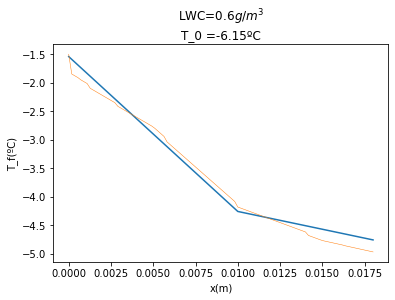

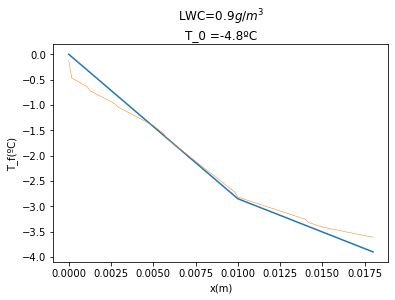

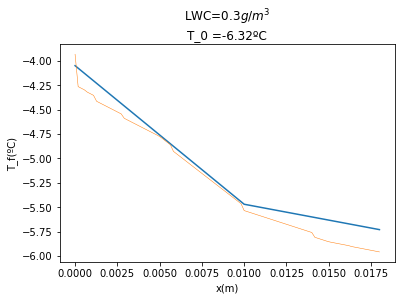

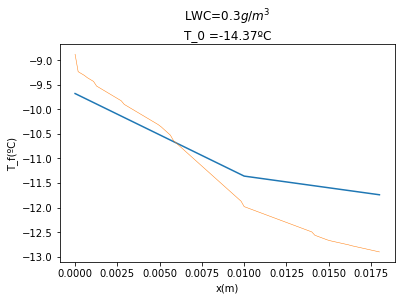

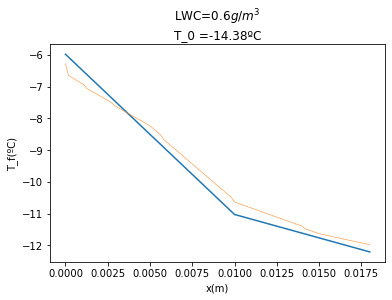

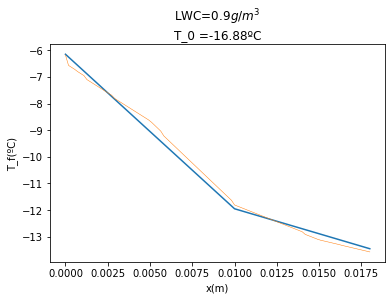

In [15]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
resultados =[]
for nombre_ensayo in ensayo:
    plt.figure()
    print(nombre_ensayo)
    Ensayo = ensayo[nombre_ensayo]
    
    LWC =Ensayo['LWC']
    x_experimental =Ensayo['x']
    T_remanso = Ensayo['T_0']
    T_experimental=np.array(Ensayo['T_f'])
    
    V = 70
    coeff=[]
    error=[]
    E =1000
    for i in range(18,100):
        h_c = 10*i
        
        coeff.append(h_c)
        
        error=np.abs(minimizacion_error(h_c,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15))
        if error< E:
            E=error
            H_c =h_c
            for h in np.linspace(h_c-5,h_c+5,11):
                error=minimizacion_error(h,T_remanso,LWC,V,betha,x_experimental,T_experimental+273.15)
                error = np.abs(error)
                if error< E:
                    E = error
                    H_c = h
#     plt.plot(coeff,error)
#     plt.plot(H_c,E,'o')
    plotfigura(H_c,T_remanso,LWC,V,betha,x_experimental,T_experimental)
    resultados.append([LWC,H_c,T_experimental[0],T_remanso,E])

In [16]:
encabezado =['LWC','h_c','T_sup_ba','T_0','error']
Resultados = pd.DataFrame(resultados,columns= encabezado)
Resultados


,LWC,h_c,T_sup_ba,T_0,error
0,0.6,523.0,-1.54,-6.15,0.228309
1,0.9,795.0,0.00,-4.80,0.316786
2,0.3,508.0,-4.05,-6.32,0.264818
3,0.3,195.0,-9.68,-14.37,1.542175
4,0.6,265.0,-5.98,-14.38,0.543559
5,0.9,289.0,-6.15,-16.88,0.188022


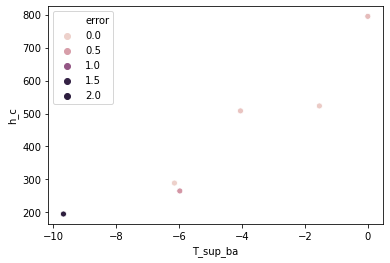

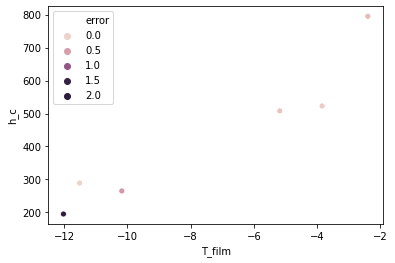

In [17]:

# resultados.plot.scatter(x='T_sup_ba',y='h_c')
# resultados.plot.scatter(x='T_0',y='h_c')
Resultados['T_film']=(Resultados['T_0']+Resultados['T_sup_ba'])/2
# resultados.plot.scatter(x='T_film',y='h_c')
sns.scatterplot(x="T_sup_ba", y="h_c",
              hue="error",
              data=Resultados[Resultados.error<2]) 
plt.figure()
sns.scatterplot(x="T_film", y="h_c",
              hue="error",
              data=Resultados[Resultados.error<2])

In [21]:
for nombre_ensayo in ensayo:
    Ensayo = ensayo[nombre_ensayo]
    
    LWC =Ensayo['LWC']
    x_experimental =Ensayo['x']
    T_remanso = Ensayo['T_0']
    T_experimental=np.array(Ensayo['T_f'])
    
    V = 70
    h_c = float(Resultados[(Resultados.LWC==LWC) & (Resultados.T_0==T_remanso)].h_c)
    Modelo_termico = fem_velocidades.analisis_termico()
    Modelo_termico.set_T_remanso(T_remanso+273.15)
    Modelo_termico.set_recovery_factor(1)
    Modelo_termico.set_presion_remanso(101325)
    Modelo_termico.set_LWC(LWC)
    Modelo_termico.set_cuerda(11.01)
    Modelo_termico.set_diametro_caracteristico(0.02)
    Modelo_termico.set_velocidad_flujo(V)
    Modelo_termico.set_freezing_fraction(0.8)
    Modelo_termico.set_flujo_masico_entrada(0)
    Modelo_termico.set_T_superficie_anterior(273.15)
    Modelo_termico.set_cp_ws_anterior(1.004)
    Modelo_termico.set_T_superficie(273.15)
    Modelo_termico.set_local_collection_efficiency(0.5)
    Modelo_termico.set_freezing_fraction(1)
    Modelo_termico.set_tamano_gota(20e-6)
    Modelo_termico.V_e = Modelo_termico.V
    Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
    Modelo_termico.set_coeficiente_convectivo(h_c)
    Modelo_termico.calculo_todos_calores_conductivo()
    print(LWC,T_remanso,-Modelo_termico.K_con+Modelo_termico.h_c, Modelo_termico.h_c)

0.6 -6.15 929.3118613089865 523.0
0.9 -4.8 927.9686945130541 795.0
0.3 -6.32 929.4817178303011 508.0
0.3 -14.37 937.714258620028 195.0
0.6 -14.38 937.724722193113 265.0
0.9 -16.88 940.3596938577126 289.0


Text(0, 0.5, '$h_{c}(\\frac{cal}{K~m^{2}~s})$')

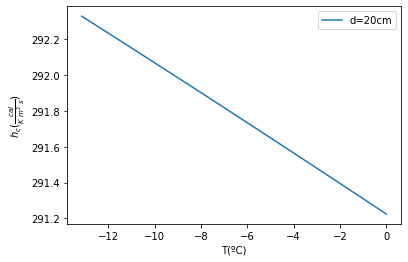

In [52]:
t_films =np.linspace(260,273.15,100)

p_remanso =101325
for i in range(20,22,2):
    d = 0.01*i
    h_con=[]
    for T_film in t_films:    
        p_estatica = p_remanso/(1+V**2/(2*287*T_film))#Pa
        rho_a = p_estatica/(.287*T_film) #g/m^3 (incompresible M<0.3)
        k_a = Modelo_termico.thermal_conductivity(T_film)
        mu_film=Modelo_termico.viscosity(T_film)
        Re_film=Modelo_termico.Reynolds(V, d, rho_a, mu_film)*10**-4
        Pr = Modelo_termico.Pr(Modelo_termico.cp_a, mu_film, k_a/360000)
        Nu = Modelo_termico.Nusselt(Pr, Re_film)
        h_con.append(Modelo_termico.film_coefficient(k_a, Nu, d/100)/3600)        
    plt.plot(t_films-273.15,h_con,label='d='+str(int(d*100))+'cm')
plt.legend()
plt.xlabel('T(ºC)')
plt.ylabel(r'$h_{c}(\frac{cal}{K~m^{2}~s})$')